In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import IPython

import librosa
import librosa.display
import random
import torchaudio, torch

import os

os.chdir('..')

In [2]:
def stft(y, sr):
    signal = librosa.stft(y)
    signal = np.abs(signal) ** 2
    signal = librosa.amplitude_to_db(signal, ref=np.max)

    plt.figure(figsize=(13, 6))
    librosa.display.specshow(signal, sr=sr, x_axis="time", y_axis='log')
    plt.colorbar(format="%+2.f")
    plt.tight_layout()

In [3]:
note = 'piano/c4.wav'
IPython.display.Audio(note)

### STFT

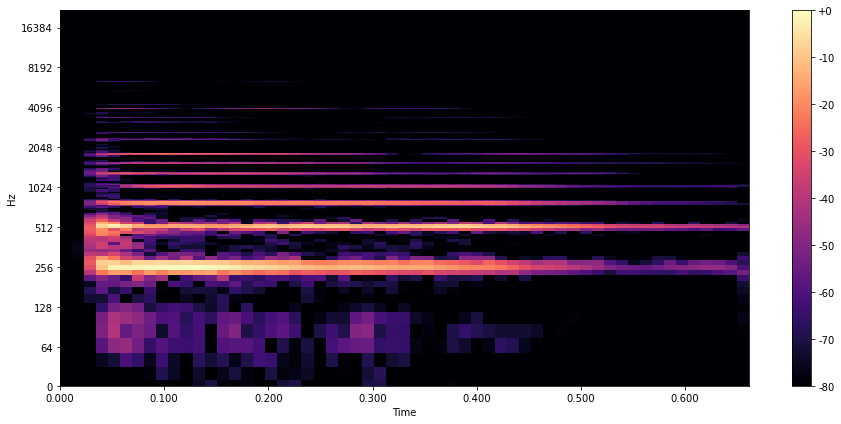

In [5]:
y, sr = librosa.load(note, sr=None)
stft(y, sr)

### FFT

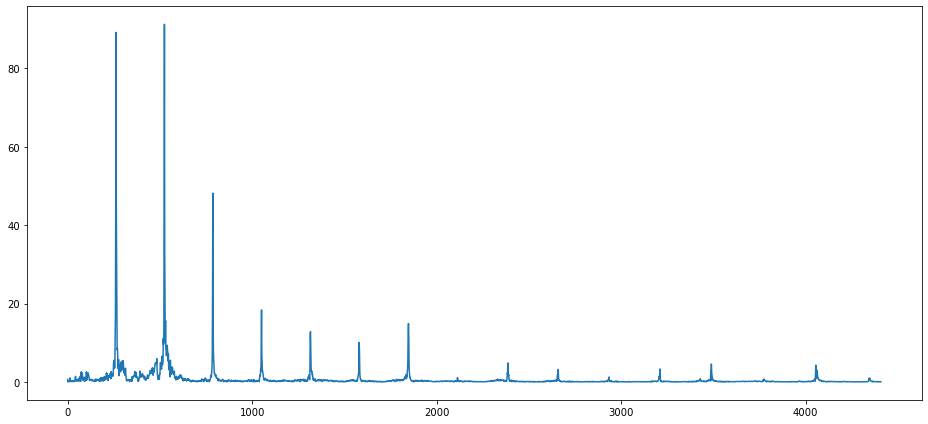

In [6]:
fft = np.fft.fft(y)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

num_bins = int(len(magnitude) * .1)

plt.figure(figsize=(13, 6))
plt.plot(frequency[:num_bins], magnitude[:num_bins]);
plt.tight_layout()

### Mel Spectrogram

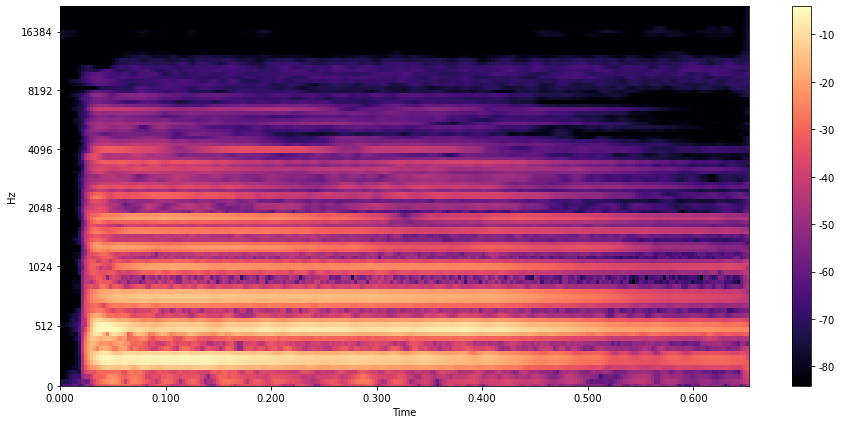

In [7]:
mel_spectrogram = librosa.feature.melspectrogram(y, sr=sr, n_fft=1024, hop_length=128, n_mels=100)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(13, 6))
librosa.display.specshow(log_mel_spectrogram, hop_length=128, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.tight_layout()

### MFCC

In [8]:
mfcc = librosa.feature.mfcc(y, n_mfcc=13, sr=sr)

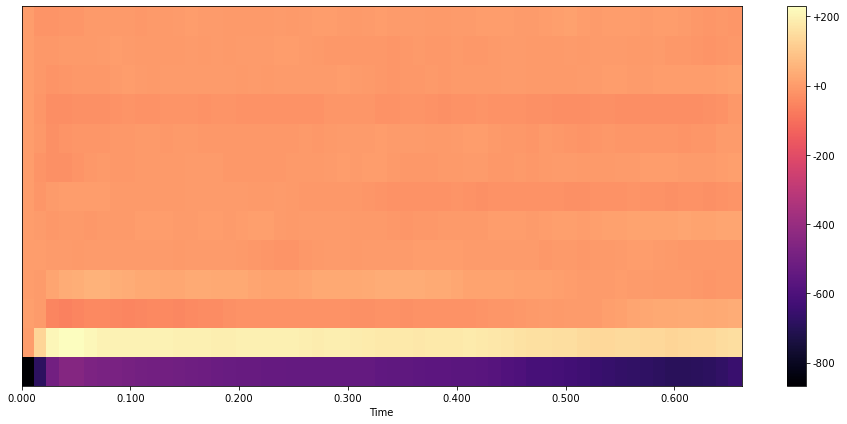

In [28]:
plt.figure(figsize=(13, 6))
librosa.display.specshow(mfcc, x_axis="time", sr=sr, cmap='magma')
plt.tight_layout()
plt.colorbar(format="%+2.f");

### Delta MFCC

In [29]:
delta1_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

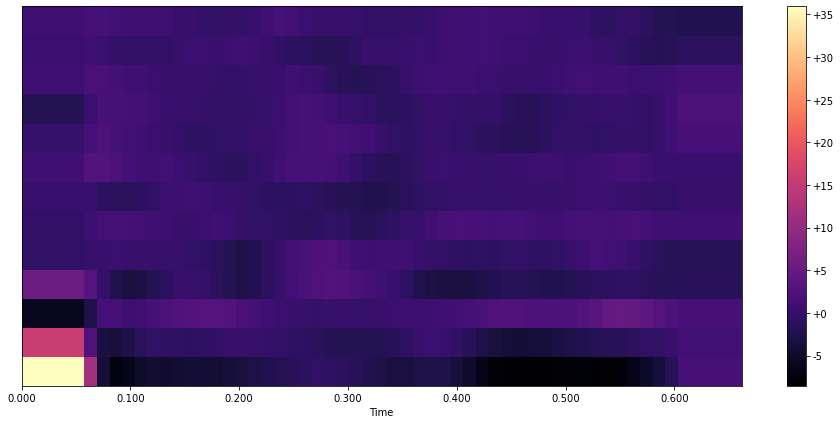

In [30]:
plt.figure(figsize=(13, 6))
librosa.display.specshow(delta1_mfcc, x_axis="time", sr=sr, cmap='magma')
plt.tight_layout()
plt.colorbar(format="%+2.f");

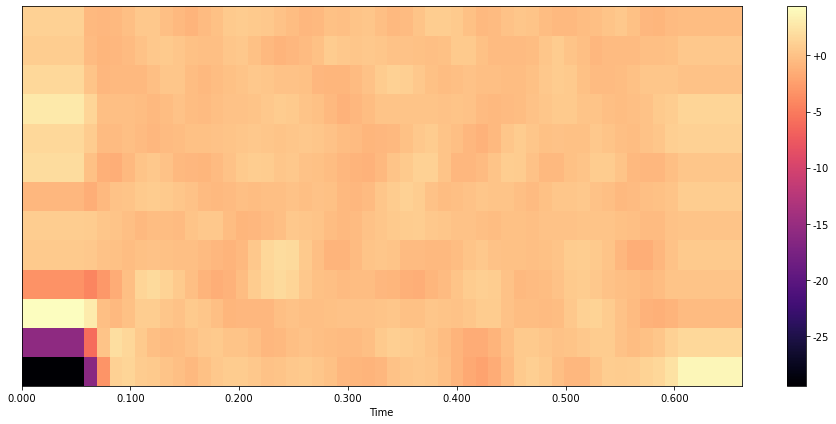

In [31]:
plt.figure(figsize=(13, 6))
librosa.display.specshow(delta2_mfcc, x_axis="time", sr=sr, cmap='magma')
plt.tight_layout()
plt.colorbar(format="%+2.f");

### Torchaudio

In [13]:
note = 'piano/c4.wav'
signal, sr = torchaudio.load(note)
signal = signal.mean(0)

In [14]:
transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=1024,
    hop_length=128,
    n_mels=100
)

In [16]:
s1 = transform(signal)
s1.shape

torch.Size([100, 225])

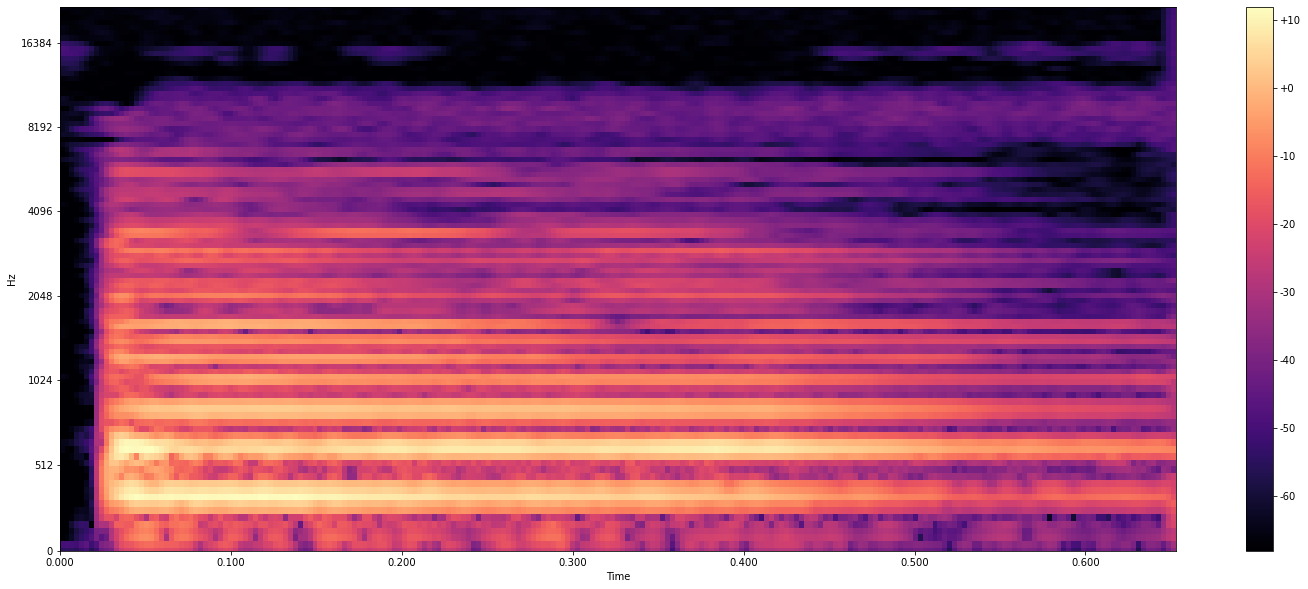

In [17]:
s1 = transform(signal)
s1 = librosa.power_to_db(s1.numpy())

plt.figure(figsize=(25, 10))
librosa.display.specshow(s1, sr=sr, hop_length=128, x_axis="time", y_axis='mel', cmap='magma');
plt.colorbar(format="%+2.f");

In [25]:
melkwargs = {
    "n_fft" : 1024, 
    "n_mels" : 100, 
    "hop_length": 128
}

transform = torchaudio.transforms.MFCC(sample_rate=sr, n_mfcc=8, melkwargs=melkwargs)

In [26]:
s1 = transform(signal).numpy()
s1.shape

(8, 225)

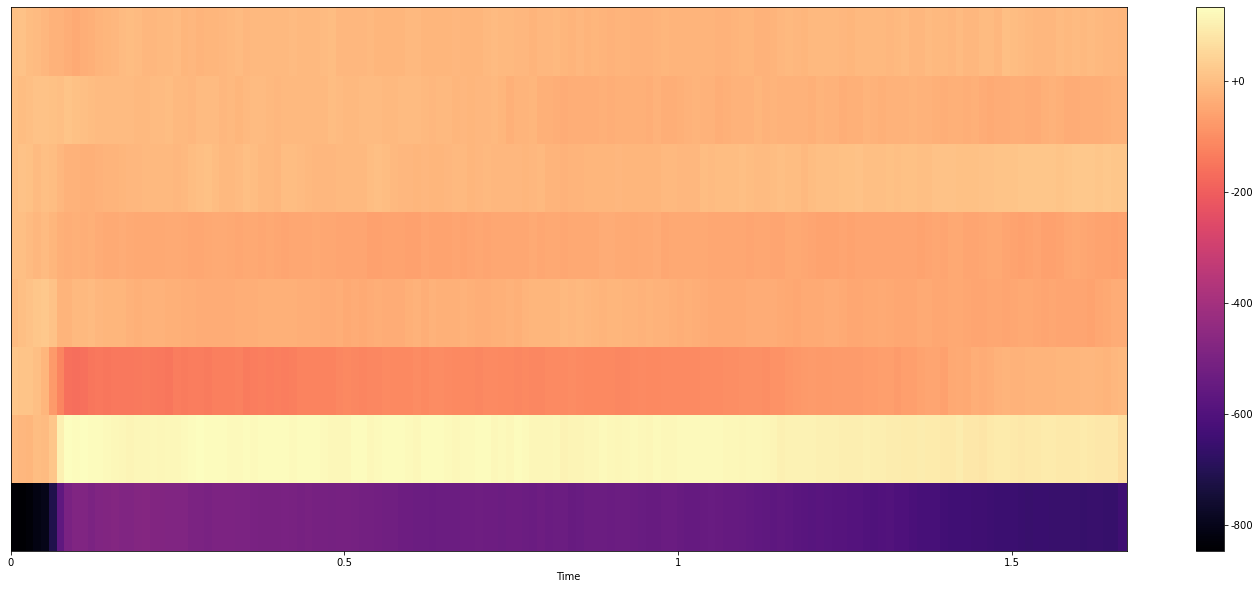

In [22]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(s1, sr=sr, x_axis="time", cmap='magma');
plt.colorbar(format="%+2.f");

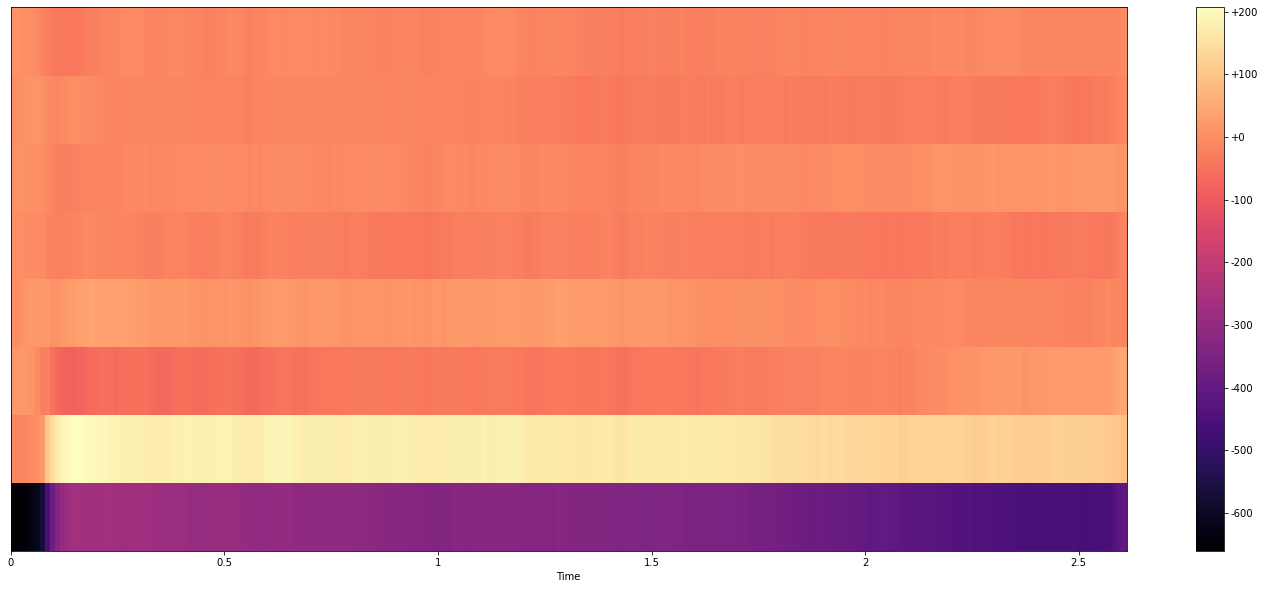

In [27]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(s1, sr=sr, x_axis="time", cmap='magma');
plt.colorbar(format="%+2.f");